In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Asteroid_Updated.csv')  

C:\Users\ray\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# look how many rows and features in the dataset
data.shape

(839714, 31)

In [4]:
data.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


-------------------Features list-----------------------
name: name
a: semi-major axis(au)
e: eccentricity
i: Inclination with respect to x-y ecliptic plane(deg)
om: Longitude of the ascending node
w: argument of perihelion
q: perihelion distance(au)
ad: aphelion distance(au)
per_y: Orbital period(YEARS)
data_arc: data arc-span(d)
condition_code: Orbit condition code
n_obs_used: Number of observation used
H: Absolute Magnitude parameter
neo: Near Earth Object
pha: Physically Hazardous Asteroid
diameter: Diameter of asteroid(Km)
extent: Object bi/tri axial ellipsoid dimensions(Km)
albedo: geometric albedo
rot_per: Rotation Period(h)
GM: Standard gravitational parameter, Product of mass and gravitational constant
BV: Color index B-V magnitude difference
UB: Color index U-B magnitude difference
IR: Color index I-R magnitude difference
spec_B: Spectral taxonomic type(SMASSII)
spec_T: Spectral taxonomic type(Tholen)
G: Magnitude slope parameter
moid: Earth Minimum orbit Intersection Distance(au)
class: asteroid orbit class
n: Mean motion(deg/d)
per: orbital Period(d)
ma: Mean anomaly(deg)

In [5]:
# features to do clustering
df = data[["a","e"]]

In [6]:
df.head()

,a,e
0,2.769165,0.076009
1,2.772466,0.230337
2,2.669150,0.256942
3,2.361418,0.088721
4,2.574249,0.191095


--------------e: eccentricity--------------------------
formula: e=foci(c)/vertices(a); 
if e = 0, then the object is more like a circle；
if e = 1, then the obejct is more like a long ellipase

In [7]:
df.isnull().sum()

a    2
e    0
dtype: int64

In [8]:
percentage_of_missing = 2/839714
percentage_of_missing

2.38176331465237e-06

In [9]:
df = df.dropna()
df

,a,e
0,2.769165,0.076009
1,2.772466,0.230337
2,2.669150,0.256942
3,2.361418,0.088721
4,2.574249,0.191095
...,...,...
839709,2.812945,0.664688
839710,2.645238,0.259376
839711,2.373137,0.202053
839712,2.260404,0.258348


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 0, 'a:semi-major axis(au)')

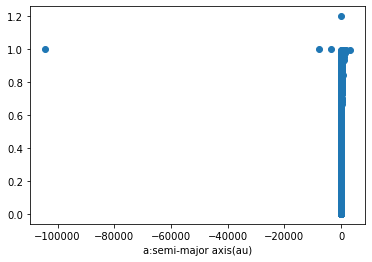

In [12]:
plt.scatter(df['a'], df['e'])
plt.xlabel('a:semi-major axis(au)')

by looking at the scatterplot graph, we can see there are some outliers

In [15]:
# remove the outliers
df = df[df.a > -80000]

Text(0.5, 0, 'a:semi-major axis(au)')

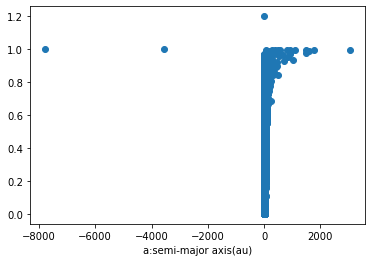

In [16]:
plt.scatter(df['a'], df['e'])
plt.xlabel('a:semi-major axis(au)')

In [18]:
scaler = MinMaxScaler()
scaler.fit(df[['a']])
df['a'] = scaler.transform(df[['a']])
df

,a,e
0,0.718826,0.076009
1,0.718826,0.230337
2,0.718817,0.256942
3,0.718788,0.088721
4,0.718808,0.191095
...,...,...
839709,0.718830,0.664688
839710,0.718814,0.259376
839711,0.718789,0.202053
839712,0.718779,0.258348


Text(0.5, 0, 'a:semi-major axis(au)')

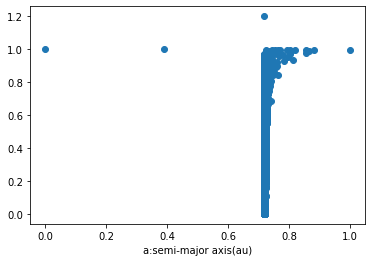

In [19]:
plt.scatter(df['a'], df['e'])
plt.xlabel('a:semi-major axis(au)')

In [20]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['a', 'e']])
    sse.append(km.inertia_)

In [21]:
sse

[7402.262462419069,
 3424.963728949176,
 1682.3554114726933,
 989.9205396855382,
 672.7568149033016,
 497.9093846255439,
 372.6969401719982,
 290.6857666383594,
 235.34802572063234]

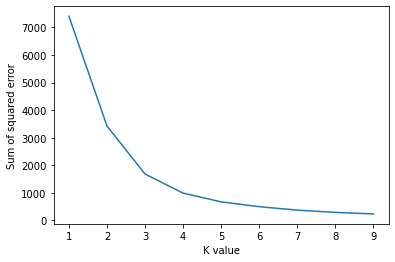

In [23]:
plt.xlabel('K value')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

In [24]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['a','e']])
y_predicted

array([1, 0, 0, ..., 0, 0, 0])

In [25]:
km.cluster_centers_

array([[0.71882401, 0.20974356],
       [0.71883656, 0.09270826],
       [0.71900189, 0.48947081]])

In [26]:
df['cluster'] = y_predicted
df

,a,e,cluster
0,0.718826,0.076009,1
1,0.718826,0.230337,0
2,0.718817,0.256942,0
3,0.718788,0.088721,1
4,0.718808,0.191095,0
...,...,...,...
839709,0.718830,0.664688,2
839710,0.718814,0.259376,0
839711,0.718789,0.202053,0
839712,0.718779,0.258348,0


No handles with labels found to put in legend.


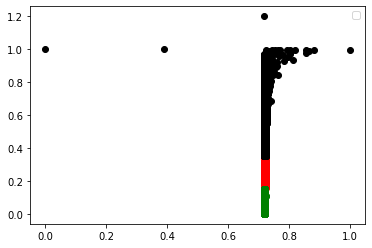

In [28]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.a, df1['e'], color='red')
plt.scatter(df2.a, df2['e'], color='green')
plt.scatter(df3.a, df3['e'], color='black')
plt.legend()

No handles with labels found to put in legend.


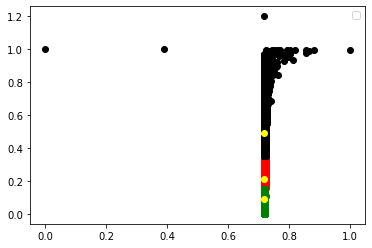

In [29]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.a, df1['e'], color='red')
plt.scatter(df2.a, df2['e'], color='green')
plt.scatter(df3.a, df3['e'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           color = 'yellow', marker = "o")
plt.legend()

Conclusion: a and e has relation that look like a vertical line